In [32]:
from numpy import loadtxt
from keras.models import Sequential #stack gibi
from keras.layers import Dense  #katman

import pandas as pd


In [3]:
#model nasıl oluşturulur
mlp=Sequential() #stack oluşturuyoz
mlp.add(Dense(12,input_dim=3,activation='relu')) #Input + Hidden 1 layer, dense katmanı ekliyoruz Dense(hidden katmanı, girdi sayısı, aktivasyon fonk.)
mlp.add(Dense(8,activation='relu')) #Hidden 2 layer, #use_bias = false yaparsak bias girmek istemiyoruz olur ve bias eklemez
mlp.add(Dense(1,activation='sigmoid'))  #output layer ,çıktı katmanı , 


mlp.summary()
#çıktıya bakınca
#12 nöron, 48 parametre , parametre hesabı = 12 nöron * 3 girdi sayısı + 12 bias =48
#8 nöron, 104 parametre , parametre hesabı = 8 nöron * 12 girdi + 8 bias = 104
#1 nöron, 9 parametre   , parametre hesabı = 1 nöron * 8 girdi + 1 bias = 9

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [4]:
#Modeli derle, Model artık eğitime hazır
mlp.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy']) #loss function seç, optimize func seç(sgd=graiednt),metricler 1den faazla ekleyebilirsin


In [33]:
#ÖRNEK ÇÖZÜM

dataset=loadtxt('pima-indians-diabetes.csv',delimiter=',')
print(dataset.shape)
X=dataset[:,0:8]
y=dataset[:,8]

(768, 9)


In [34]:
#model nasıl oluşturulur
mlp=Sequential() #stack oluşturuyoz
mlp.add(Dense(12,input_dim=8,activation='relu')) #Input + Hidden 1 layer, dense katmanı ekliyoruz Dense(hidden katmanı, girdi sayısı, aktivasyon fonk.)
mlp.add(Dense(8,activation='relu')) #Hidden 2 layer, #use_bias = false yaparsak bias girmek istemiyoruz olur ve bias eklemez
mlp.add(Dense(1,activation='sigmoid'))  #output layer ,çıktı katmanı , 


mlp.summary()
#çıktıya bakınca
#12 nöron, 48 parametre , parametre hesabı = 12 nöron * 3 girdi sayısı + 12 bias =48
#8 nöron, 104 parametre , parametre hesabı = 8 nöron * 12 girdi + 8 bias = 104
#1 nöron, 9 parametre   , parametre hesabı = 1 nöron * 8 girdi + 1 bias = 9


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                108       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [35]:
#Modeli derle, Model artık eğitime hazır
mlp.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy']) #loss function seç, optimize func seç(sgd=graiednt),metricler 1den faazla ekleyebilirsin


In [ ]:
mlp.fit(X,y,epochs=50,batch_size=10)

In [ ]:
#test işemi
scores=mlp.evaluate(X,y)
print("Accuracy:",scores[1]*100)

24/24 [==============================] - 0s 2ms/step - loss: 0.5984 - accuracy: 0.6810
Accuracy: 68.09895634651184


In [ ]:
#modeli tahmin ettirelim
predictions=(mlp.predict(X) > 0.5).astype(int)
#ilk 5 üyenin tahminleri
for i in range(10):
  print(X[i].tolist(),predictions[i],y[i])

24/24 [==============================] - 0s 2ms/step
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] [1] 1.0
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] [0] 0.0
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] [1] 1.0
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] [0] 0.0
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] [0] 1.0
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] [0] 0.0
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] [0] 1.0
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] [1] 0.0
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] [0] 1.0
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] [0] 1.0


In [36]:
# train,validation,test /train test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=58)
#X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.1,random_state=58)
X_train.shape
#X_test.shape




(614, 8)

In [49]:
#Yapay sinir ağını eğitmek için birde validationa ihtiyacımız var.
#mlp.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=50)

#validasyon için train verisinin 0.1ini ayırıyor
history=mlp.fit(X_train,y_train,validation_split=0.1,epochs=250)

#eğitim ve test için scorelarımız
scores=mlp.evaluate(X_train,y_train)
print("Training Accurary:",scores[1]*100)
scores=mlp.evaluate(X_test,y_test)
print("Test Accurary",scores[1]*100)
#scores=mlp.evaluate(X_val,y_val)
#print("Test Accurary",scores[1]*100)

Epoch 1/250
18/18 [==============================] - 0s 6ms/step - loss: 0.5957 - accuracy: 0.6630 - val_loss: 0.6327 - val_accuracy: 0.6774
Epoch 2/250
18/18 [==============================] - 0s 4ms/step - loss: 0.5914 - accuracy: 0.6630 - val_loss: 0.6231 - val_accuracy: 0.6935
Epoch 3/250
18/18 [==============================] - 0s 4ms/step - loss: 0.5971 - accuracy: 0.6558 - val_loss: 0.6542 - val_accuracy: 0.6774
Epoch 4/250
18/18 [==============================] - 0s 3ms/step - loss: 0.6133 - accuracy: 0.6649 - val_loss: 0.6315 - val_accuracy: 0.6935
Epoch 5/250
18/18 [==============================] - 0s 4ms/step - loss: 0.5949 - accuracy: 0.6612 - val_loss: 0.6747 - val_accuracy: 0.6613
Epoch 6/250
18/18 [==============================] - 0s 3ms/step - loss: 0.5938 - accuracy: 0.6685 - val_loss: 0.6193 - val_accuracy: 0.6774
Epoch 7/250
18/18 [==============================] - 0s 4ms/step - loss: 0.5883 - accuracy: 0.6703 - val_loss: 0.6621 - val_accuracy: 0.6613
Epoch 8/250
1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


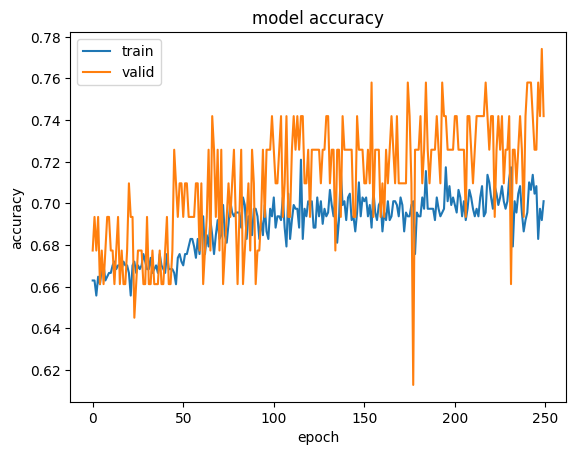

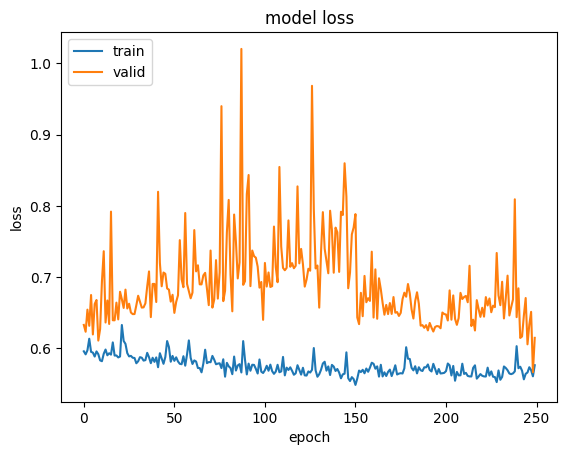

In [50]:
#Grafiğe dökme
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','valid'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'],loc='upper left')
plt.show()

5/5 [==============================] - 0s 3ms/step
[[0.55194805 0.07142857]
 [0.25324675 0.12337662]]
0.3275862068965517
recall score:  0.32758620689655177
0.6333333333333333
Specificity:  0.8854166666666667


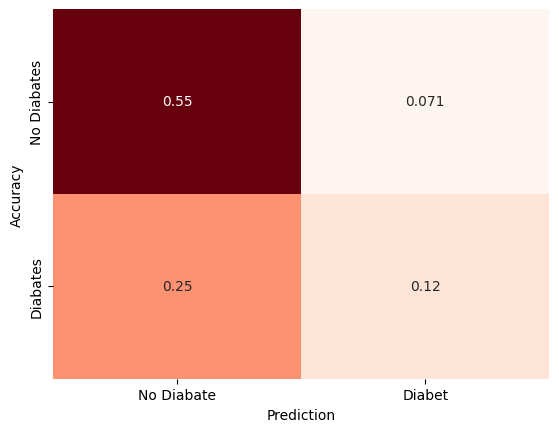

In [65]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt



pred_test=mlp.predict(X_test)

y_pred=[]
for i in pred_test:
  if(i>=0.5):
    y_pred.append(1)
  else:
    y_pred.append(0)

cm=confusion_matrix(y_test,y_pred,normalize="all")
print(cm)

print(recall_score(y_test,y_pred))     #cmnin çözümünü doğrulamak için recall_score(yani sens) bu değeri kendimiz deneyerek baktık
print("recall score: ",cm[1][1]/(cm[1][1]+cm[1][0]))     #kendimiz bulmak istersek


print(precision_score(y_test,y_pred))

#TN/TN+FP
print("Specificity: ",cm[0][0]/(cm[0][0]+cm[0][1]) )   #Kendimiz hesaplarsak





ax=sns.heatmap(cm,annot=True,xticklabels=["No Diabate","Diabet"],yticklabels=["No Diabates","Diabates"],cbar=False,cmap="Reds")
ax.set_xlabel("Prediction")
ax.set_ylabel("Accuracy")
plt.show()